# Newcomb-Benford Law

Benford’s law states that, in many real-life numerical dataset, the leading digit follows a distributions that skew towards smaller values.

Specifically, the leading digit $d \in \{1, \dots,9\}$ occurs with probability

$$ P(d) = \log_{10}\left(1+\frac{1}{d}\right) $$

This notebook explains this theorem by running random experiments on a log-uniformly distributed dataset.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

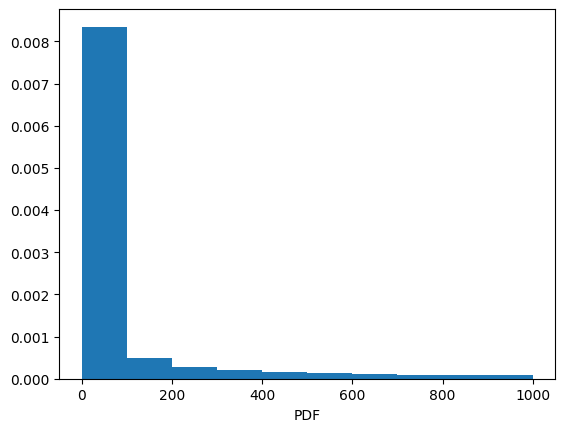

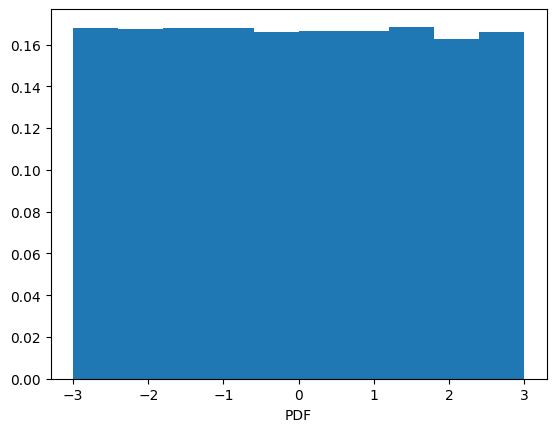

In [5]:
def sample_unif(a, b, size):
    return np.random.uniform(a, b, size)

def sample_log_unif(a, b, size):
    y = sample_unif(np.log(a), np.log(b), size)
    return np.exp(y)


# Test the log uniform sampler
X = sample_log_unif(1e-3, 1e3, 100000)
Y = np.log10(X)

plt.figure()
plt.hist(X, bins=10, density=True)
plt.xlabel("X")
plt.xlabel("PDF")
plt.show()

plt.figure()
plt.hist(Y, bins=10, density=True)
plt.xlabel("Log10(X)")
plt.xlabel("PDF")
plt.show()
plt.close('all')

Leading digit count: [0.30167 0.17667 0.12282 0.09696 0.07912 0.06619 0.05861 0.05135 0.04661]


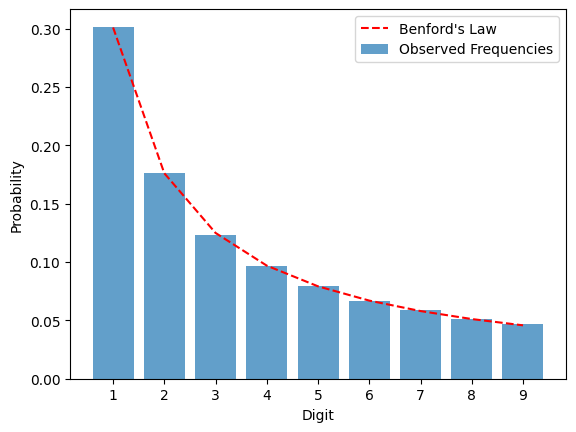

In [39]:
# Implement the leading digit counting procedure
def leading_digits(X, base=10):
    # Decompose into x = a * 10**b
    b = np.floor(np.log(X) / np.log(base))
    a = X / base**b
    return np.floor(a).astype(int)


def count_leading_digits(X, base=10, probability=False):
    Y = leading_digits(X, base)
    count = np.bincount(Y, minlength=base-1)
    assert count[0] == 0
    count = count[1:]
    if probability:
        return count / len(X)
    else:
        return count
    
    
# Test Benford's Law on a log-uniformly distributed data [eps, b]
base = 10
X = sample_log_unif(1, base**3, 100000)
count = count_leading_digits(X, base, probability=True)
print("Leading digit count:", count)

plt.figure()
# Plot the observed frequencies
plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
# Plot the theoretical probabilities
benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
plt.legend()
plt.xticks(range(1, base))
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.show()
plt.close('all')